In [1]:
Objective:Explore the data by analysing which feature is more efficient to determine the surv_status of the patients 
          after the operation.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

haberman = pd.read_csv(r'C:\Users\Bhuvana Chandrahasan\haberman.csv')

In [8]:
#total no. of datapoints and no.of features.
print(haberman.shape)

(306, 4)


In [9]:
#features
print(haberman.columns)

Index(['Age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


In [13]:
haberman["surv_status"].value_counts()
#no. of class with data points per class
#the haberman is imbalanced dataset,the datapoints are different for both the class.

1    225
2     81
Name: surv_status, dtype: int64

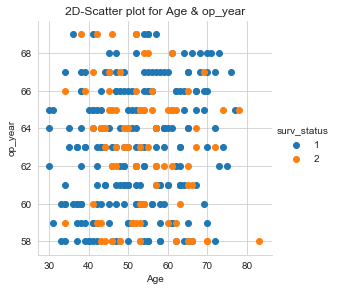

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="surv_status",height=4)\
   .map(plt.scatter,"Age","op_year")\
   .add_legend()
plt.title("2D-Scatter plot for Age & op_year")
plt.show()

In [ ]:
Observation:
1.Using op_year and Age feature,we cannot distinguish between the survival status 1 and 2.
2.We can observe that many operations between age 44 and 65 were performed,as there is overlapping.

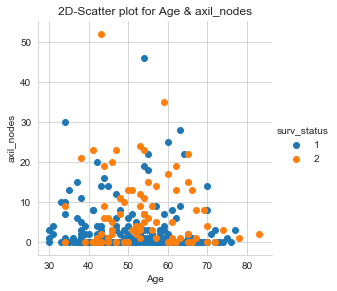

In [22]:
sns.FacetGrid(haberman,hue="surv_status",height=4)\
   .map(plt.scatter,"Age","axil_nodes")\
   .add_legend()
plt.title("2D-Scatter plot for Age & axil_nodes")
plt.show()

In [ ]:
Observation:
1.Using Age and axil_nodes feature,majority of age groups are likely to survive more than 5years or longer ,
  detected with 0 axil_nodes.
2.No linear seperation is possible as there is wide overlappig.

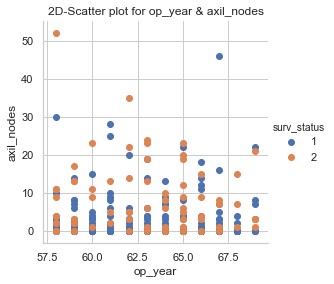

In [58]:
sns.FacetGrid(haberman,hue="surv_status",height=4)\
   .map(plt.scatter,"op_year","axil_nodes")\
   .add_legend()
plt.title("2D-Scatter plot for op_year & axil_nodes")
plt.show()

In [ ]:
Observation:
    1.Using axil_nodes and op_year ,many operations were done with the axil_nodes ranging 0 to 20.
    2.Also,we get a insight that majority of the patients died within 5years.

In [ ]:
1.from above observations,axil_nodes feature is comparatively better from other two features Age and op_year. 
2.Also,the combination of axil_nodes with age plot is better than the plot for axil_nodes vs op_year.

C:\Users\Bhuvana Chandrahasan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


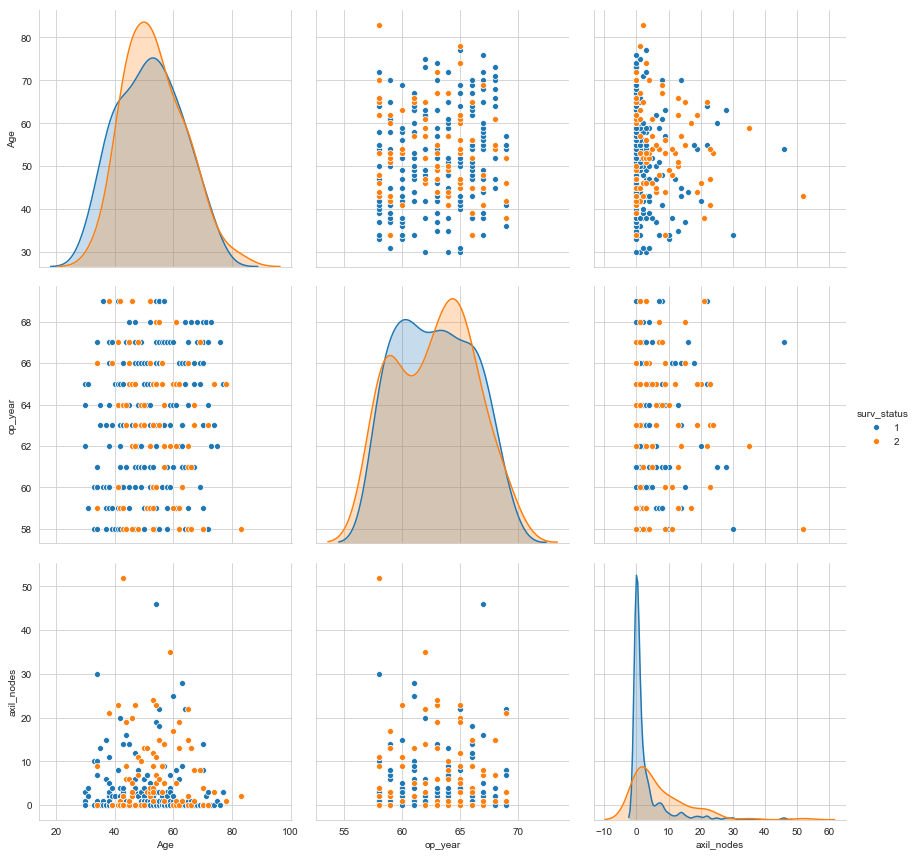

In [4]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="surv_status",vars=["Age","op_year","axil_nodes"],height=4)
plt.show()

In [ ]:
observation:
1.From the pair plot,most useful feature is not known to identify the survival statuses.
2.survival status of patients likely to live 5years or longer and patient died within 5 years
  is linearly not seperable due to overlapping.
3.We cannot find "lines" and "if-else" conditions to build a simple model to classify the survival status.

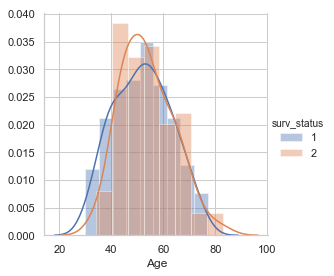

In [55]:
sns.FacetGrid(haberman,hue="surv_status",height=4)\
   .map(sns.distplot,"Age")\
   .add_legend()
plt.show()

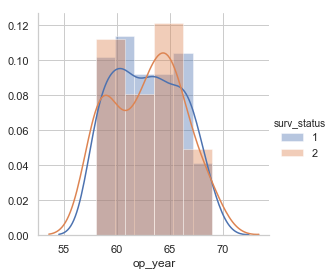

In [56]:
sns.FacetGrid(haberman,hue="surv_status",height=4)\
   .map(sns.distplot,"op_year")\
   .add_legend()
plt.show()

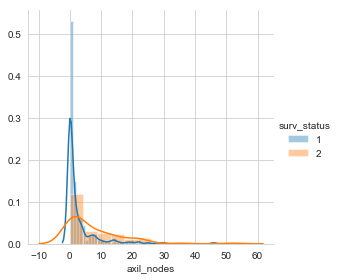

In [35]:
sns.FacetGrid(haberman,hue="surv_status",height=4)\
   .map(sns.distplot,"axil_nodes")\
   .add_legend()
plt.show()

In [ ]:
from the histogram of axil_nodes,more patients are likely to survive more than 5 years with axil_nodes 0.

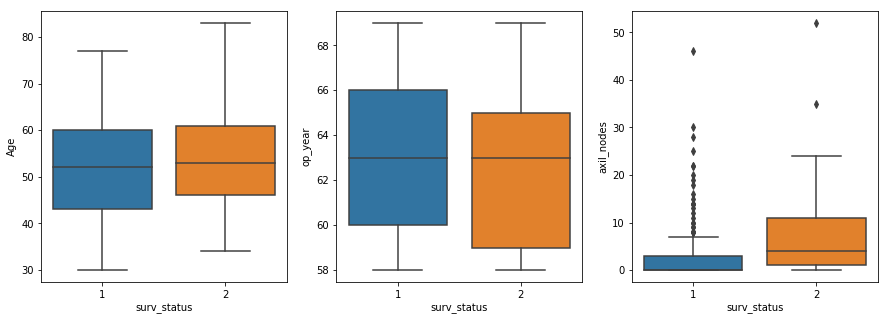

In [3]:
fig,axes=plt.subplots(1,3,figsize=(15,5));
for idx ,feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot(x="surv_status",y=feature,data=haberman,ax=axes[idx])
plt.show()

In [ ]:
observations:
1.The percentile(25,50,75) values are known by plotting box plot for each feature.
2.from fig 3 ,we get a insight that patients with 0 axil_nodes survived the most 
where as axil_nodes>2 are likely to not survive after the operation.

C:\Users\Bhuvana Chandrahasan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


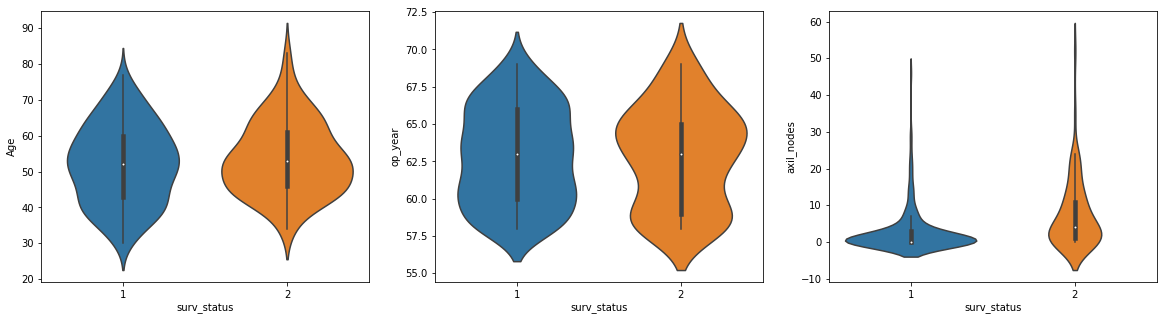

In [4]:
fig,axes=plt.subplots(1,3,figsize=(20,5));
for idx ,feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot(x="surv_status",y=feature,data=haberman,ax=axes[idx])
plt.show()

In [ ]:
observations:
1.The violin plot is a combination of box plot and pdf.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


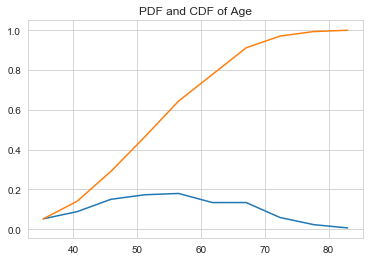

In [28]:
counts,bin_edges = np.histogram(haberman["Age"],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title("PDF and CDF of Age")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


In [ ]:
Observations:
1.Around 90% of patients whose survival status after the operation was below 5years was with age group 65 years and above.

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


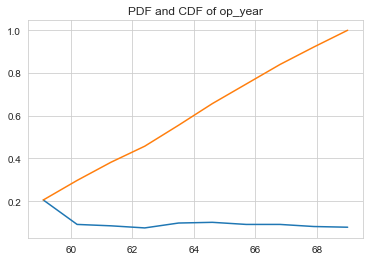

In [34]:
counts,bin_edges = np.histogram(haberman["op_year"],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title("PDF and CDF of op_year")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show()

In [ ]:
observation:
1.20% of patients survived with age group less than 59.5.
2.Around 90% of the patients survival status was failure with age group greater than 67yrs.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


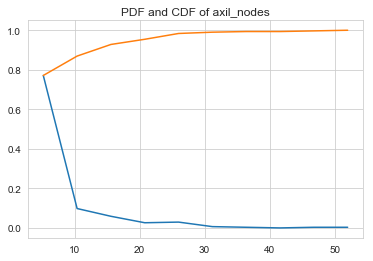

In [5]:
counts,bin_edges = np.histogram(haberman["axil_nodes"],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title("PDF and CDF of axil_nodes")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.show()

In [ ]:
observations:
1.Around 78% of patients survived after the operation with axil_nodes less than equal to 5.
